# Продажи и их анализ

Посмотрел вебинар от А. Карпова и выполнил все манипуляциями с данными. https://youtu.be/1Irng_IZV84

Задача: проанализировать, как меняется число покупок в течение года у онлайн-ретейлера.

In [106]:
import pandas as pd

import seaborn as sns

In [107]:
retails = pd.read_csv('file1.csv', encoding = 'ISO-8859-1')

Узнаем, что из себя представляет набор данных.

In [108]:
retails.shape

(541909, 8)

In [109]:
retails.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Предобработка данных

In [110]:
retails.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Проверим, что это же за транзакции с отрицательной стоимостью!

In [111]:
retails[retails.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


В описании видим, что транзакция не прошла. Вторая проблема, что CustomerID равен NaN, т.е. здесь информации нет.

А сколько же у нас вообще записей с неизвестным CustomerID?

In [112]:
retails.CustomerID.isna().sum()

135080

Выходит, что у 135 000 транзакций нет информации по CustomerID. Чтобы нам было легче в дальнейшем анализировать данные, заменим все значения NaN на 0

In [113]:
retails = retails.fillna({'CustomerID' : 0})

Проверим, произошла ли замена

In [114]:
retails[retails.CustomerID == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,0.0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,0.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,0.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,0.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,0.0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,0.0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,0.0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,0.0,United Kingdom


Число строк с 0 равно числу строк с NaN, а значит замена успешная. Но, для удобства изменим тип CustomerID с float на int, и проверим.

In [115]:
retails = retails.astype({'CustomerID' : 'int'})

In [116]:
retails.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

А теперь удаляем все строки, которые имеют UnitPrice < 0

In [117]:
retails = retails.query('UnitPrice > 0')

Сохраняем предобработанные данные в csv файл.

In [118]:
retails.to_csv('clean_retails_data.csv', index = False)

Давайте начнём. Узнаем, а сколько транзакций по странам?

In [119]:
retails.groupby('Country', as_index = False).agg({'CustomerID': 'count'}) \
    .sort_values('CustomerID', ascending = False).head()
    

,Country,CustomerID
36,United Kingdom,492979
14,Germany,9493
13,France,8556
10,EIRE,8192
31,Spain,2532


А сколько было уникальных пользователей в этих странах?

In [120]:
retails[retails.CustomerID > 0].groupby('Country', as_index = False) \
    .agg({'CustomerID': pd.Series.nunique}) \
    .sort_values('CustomerID', ascending = False).head()

,Country,CustomerID
35,United Kingdom,3949
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


In [121]:
retails['InvoiceDate'] = pd.to_datetime(retails['InvoiceDate'])

Выберем пользователей, которые живут в Великобритании

In [122]:
UK_data = retails.query("Country == 'United Kingdom' & CustomerID > 0")

In [123]:
UK_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom


Сколько было уникальных пользователей по месяцам?

In [124]:
UK_data.index = UK_data.InvoiceDate

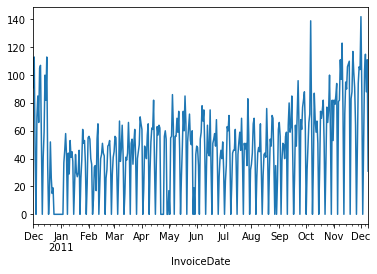

In [125]:
UK_data.resample('D').CustomerID.nunique().plot()

Отлично, но частые уходы в нули мешают его анализу. Попробуем использовать скользящее среднее.

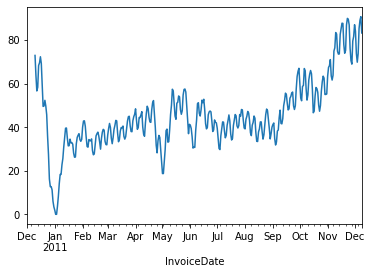

In [127]:
UK_data.resample('D').CustomerID.nunique().rolling(10).mean().plot()

И что мы видим? Классическая картина продаж в течение года с просадкой в январе, средним уровнем в течение весны и лета, и повышением спроса в конце года.